## Bamboo Weekly 11 | Software Jobs

With the recent layoffs in tech, it's easy to think there aren't any open jobs for programmers. How do coding jobs compare with the rest of the economy? And are all countries experiencing trouble?

In [195]:
# Imports
from typing import Union
import pandas as pd
import numpy as np

# import modin.pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib.dates as mdates
from urllib.request import urlretrieve

print("Setup Complete")


Setup Complete


### Q1-Turn aggregate job postings into a data frame (aggregate_df). We're interested in the date and seasonally adjusted number of job postings, but only where “variable” is “total postings”.

In [227]:
# Q1-Turn aggregate job postings into a data frame (aggregate_df).
# We're interested in the date and seasonally adjusted number of job postings, but only where “variable” is “total postings”.
url_aggregate = "https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/US/aggregate_job_postings_US.csv"

aggregate_df = pd.read_csv(url_aggregate)
aggregate_df.head()

,date,jobcountry,indeed_job_postings_index_SA,indeed_job_postings_index_NSA,variable
0,2020-02-01,US,100.00,100.00,total postings
1,2020-02-02,US,99.98,100.06,total postings
2,2020-02-03,US,99.97,100.09,total postings
3,2020-02-04,US,100.03,100.18,total postings
4,2020-02-05,US,100.12,100.29,total postings


In [99]:
aggregate_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           2324 non-null   object 
 1   jobcountry                     2324 non-null   object 
 2   indeed_job_postings_index_SA   2324 non-null   float64
 3   indeed_job_postings_index_NSA  2324 non-null   float64
 4   variable                       2324 non-null   object 
dtypes: float64(2), object(3)
memory usage: 90.9+ KB


In [100]:
aggregate_df.value_counts(subset=["variable"])


variable      
new postings      1162
total postings    1162
dtype: int64

In [101]:
# Filter total postings
df_total_postings = aggregate_df.loc[aggregate_df["variable"] == "total postings"]
df_total_postings.head()


,date,jobcountry,indeed_job_postings_index_SA,indeed_job_postings_index_NSA,variable
0,2020-02-01,US,100.00,100.00,total postings
1,2020-02-02,US,99.98,100.06,total postings
2,2020-02-03,US,99.97,100.09,total postings
3,2020-02-04,US,100.03,100.18,total postings
4,2020-02-05,US,100.12,100.29,total postings


### Q2-On how many days since data collection began has the index been greater than 100 (i.e., more postings than in February 2020)?


In [102]:
# Q2-On how many days since data collection began has the index been greater than 100 (i.e., more postings than in February 2020)?
df_index_gte_100_sa = df_total_postings.loc[
    df_total_postings["indeed_job_postings_index_SA"] > 100
]
num_index_gte_100_sa = df_index_gte_100_sa.shape[0]
perc_gte_100_sa = df_index_gte_100_sa.shape[0] / df_total_postings.shape[0]
print(
    f"The number of days that the SA index is greater than 100 is: {num_index_gte_100_sa} | {perc_gte_100_sa:.2%}"
)
print(df_index_gte_100_sa)


The number of days that the SA index is greater than 100 is: 809 | 69.62%
            date jobcountry  indeed_job_postings_index_SA  \
3     2020-02-04         US                        100.03   
4     2020-02-05         US                        100.12   
5     2020-02-06         US                        100.24   
6     2020-02-07         US                        100.20   
7     2020-02-08         US                        100.24   
...          ...        ...                           ...   
1157  2023-04-03         US                        133.49   
1158  2023-04-04         US                        133.44   
1159  2023-04-05         US                        133.37   
1160  2023-04-06         US                        133.24   
1161  2023-04-07         US                        133.21   

      indeed_job_postings_index_NSA        variable  
3                            100.18  total postings  
4                            100.29  total postings  
5                            10

### Q3-Draw a line plot with the posting index per day.


<Figure size 1500x500 with 0 Axes>

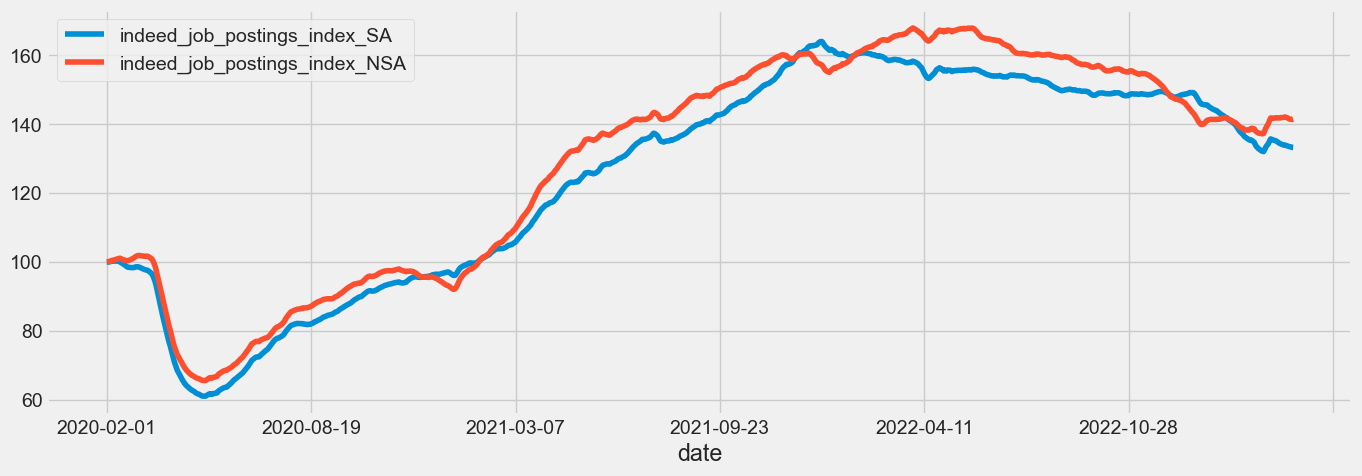

In [103]:
# Q3-Draw a line plot with the posting index per day.
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))

df_total_postings.plot(x="date", figsize=(15, 5))
# sns.lineplot(df_total_postings, x="date")
# plt.tight_layout()
plt.show()


### Q4-Create a second data frame (sector_df) from the job_postings_by_sector_US file. We're interested in the date, postings_index, and display_name columns.
### Q5-Reformat the data such that the index contains the date, and the columns are the various sectors.

In [104]:
# Q4-Create a second data frame (sector_df) from the job_postings_by_sector_US file.
# We're interested in the date, postings_index, and display_name columns.
# Q5-Reformat the data such that the index contains the date, and the columns are the various sectors.
url = "https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/US/job_postings_by_sector_US.csv"
sector_df = pd.read_csv(url, index_col=["date"])
sector_df


,jobcountry,indeed_job_postings_index,variable,display_name
date,,,,
2020-02-01,US,100.00,total postings,Accounting
2020-02-02,US,99.84,total postings,Accounting
2020-02-03,US,99.68,total postings,Accounting
2020-02-04,US,99.51,total postings,Accounting
2020-02-05,US,99.48,total postings,Accounting
...,...,...,...,...
2023-04-03,US,141.50,total postings,Loading & Stocking
2023-04-04,US,140.70,total postings,Loading & Stocking
2023-04-05,US,140.08,total postings,Loading & Stocking


In [105]:
# check the number of days
sector_df.reset_index()["date"].nunique()

1162

In [ ]:
# check display_name
sector_df["display_name"].value_counts()

In [107]:
# Q6-On how many days since data collection began has the index for
# software development been greater than 100 (i.e., more postings than in February 2020)?
sector_df_sd = (
    sector_df.loc[
        (sector_df["display_name"] == "Software Development")
        & (sector_df["indeed_job_postings_index"] > 100)
    ]
    .groupby(by=["date", "display_name"])
    .agg({"indeed_job_postings_index": "mean"})
    .reset_index()
)
print(
    f"Number of days of software development index greater than 100 is: {sector_df_sd.shape[0]} days"
)


Number of days of software development index greater than 100 is: 800 days


### Q7-Draw a line plot with the posting index for software development per day.


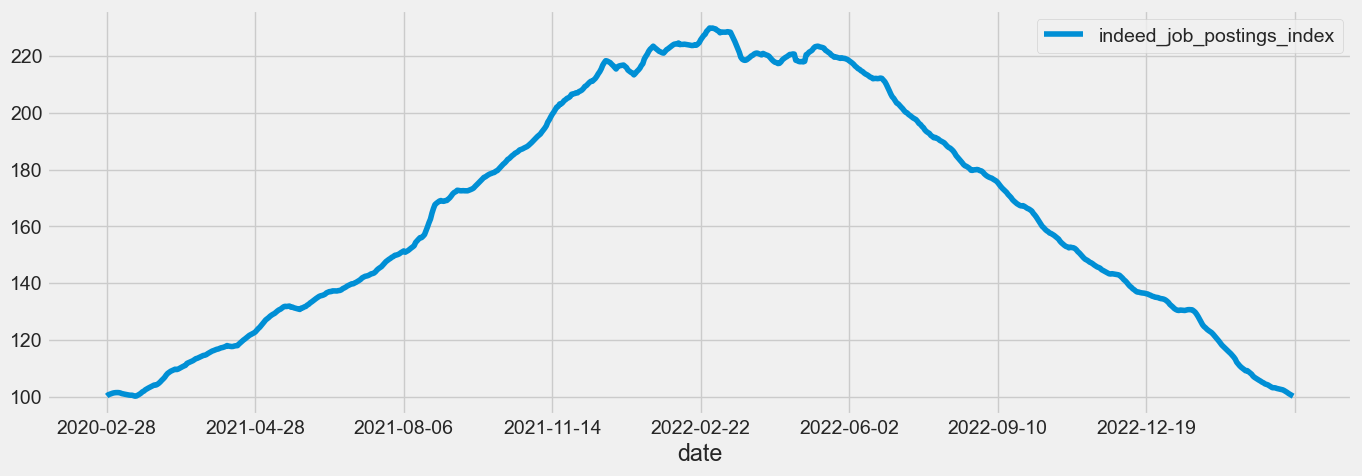

In [108]:
# Q7-Draw a line plot with the posting index for software development per day.
sector_df_sd.plot(x="date", figsize=(15, 5))
plt.show()


### Q8-On how many days since January 1st, 2023, has the index for software development been greater than 100 (i.e., more postings than in February 2020)?

In [109]:
# Q8-On how many days since January 1st, 2023,
# has the index for software development been greater than 100 (i.e., more postings than in February 2020)?
df_filtered = sector_df_sd.loc[sector_df_sd["date"] >= "2023-01-01"].reset_index(
    drop=True
)
num_days_gte_100 = df_filtered.shape[0]
print(
    f"Number of days since January 1, 2023 that index is greater than 100: {num_days_gte_100}"
)


Number of days since January 1, 2023 that index is greater than 100: 87


In [ ]:
sector_df["display_name"].value_counts()

### Q9-Which two sectors' job-posting indexes are most highly correlated with software development? Which two are least correlated with software development?

In [226]:
# Q9-Which two sectors' job-posting indexes are most highly correlated with software development?
# Which two are least correlated with software development?

# Reset index
sector_df_ = sector_df.reset_index()
# Pivot table
df_pivot = pd.pivot_table(
    sector_df_,
    values="indeed_job_postings_index",
    index=["date"],
    columns=["display_name"],
)

# df_pivot
# Create a correlation matrix
corr_matrix = df_pivot.corr()
corr_matrix[["Software Development"]].sort_values(
    by=["Software Development"], ascending=False
)[:10]


display_name,Software Development
display_name,
Software Development,1.000000
Mathematics,0.995460
Information Design & Documentation,0.992702
Human Resources,0.983365
Media & Communications,0.979989
IT Operations & Helpdesk,0.975665
Banking & Finance,0.975580
Marketing,0.969242
Scientific Research & Development,0.965976


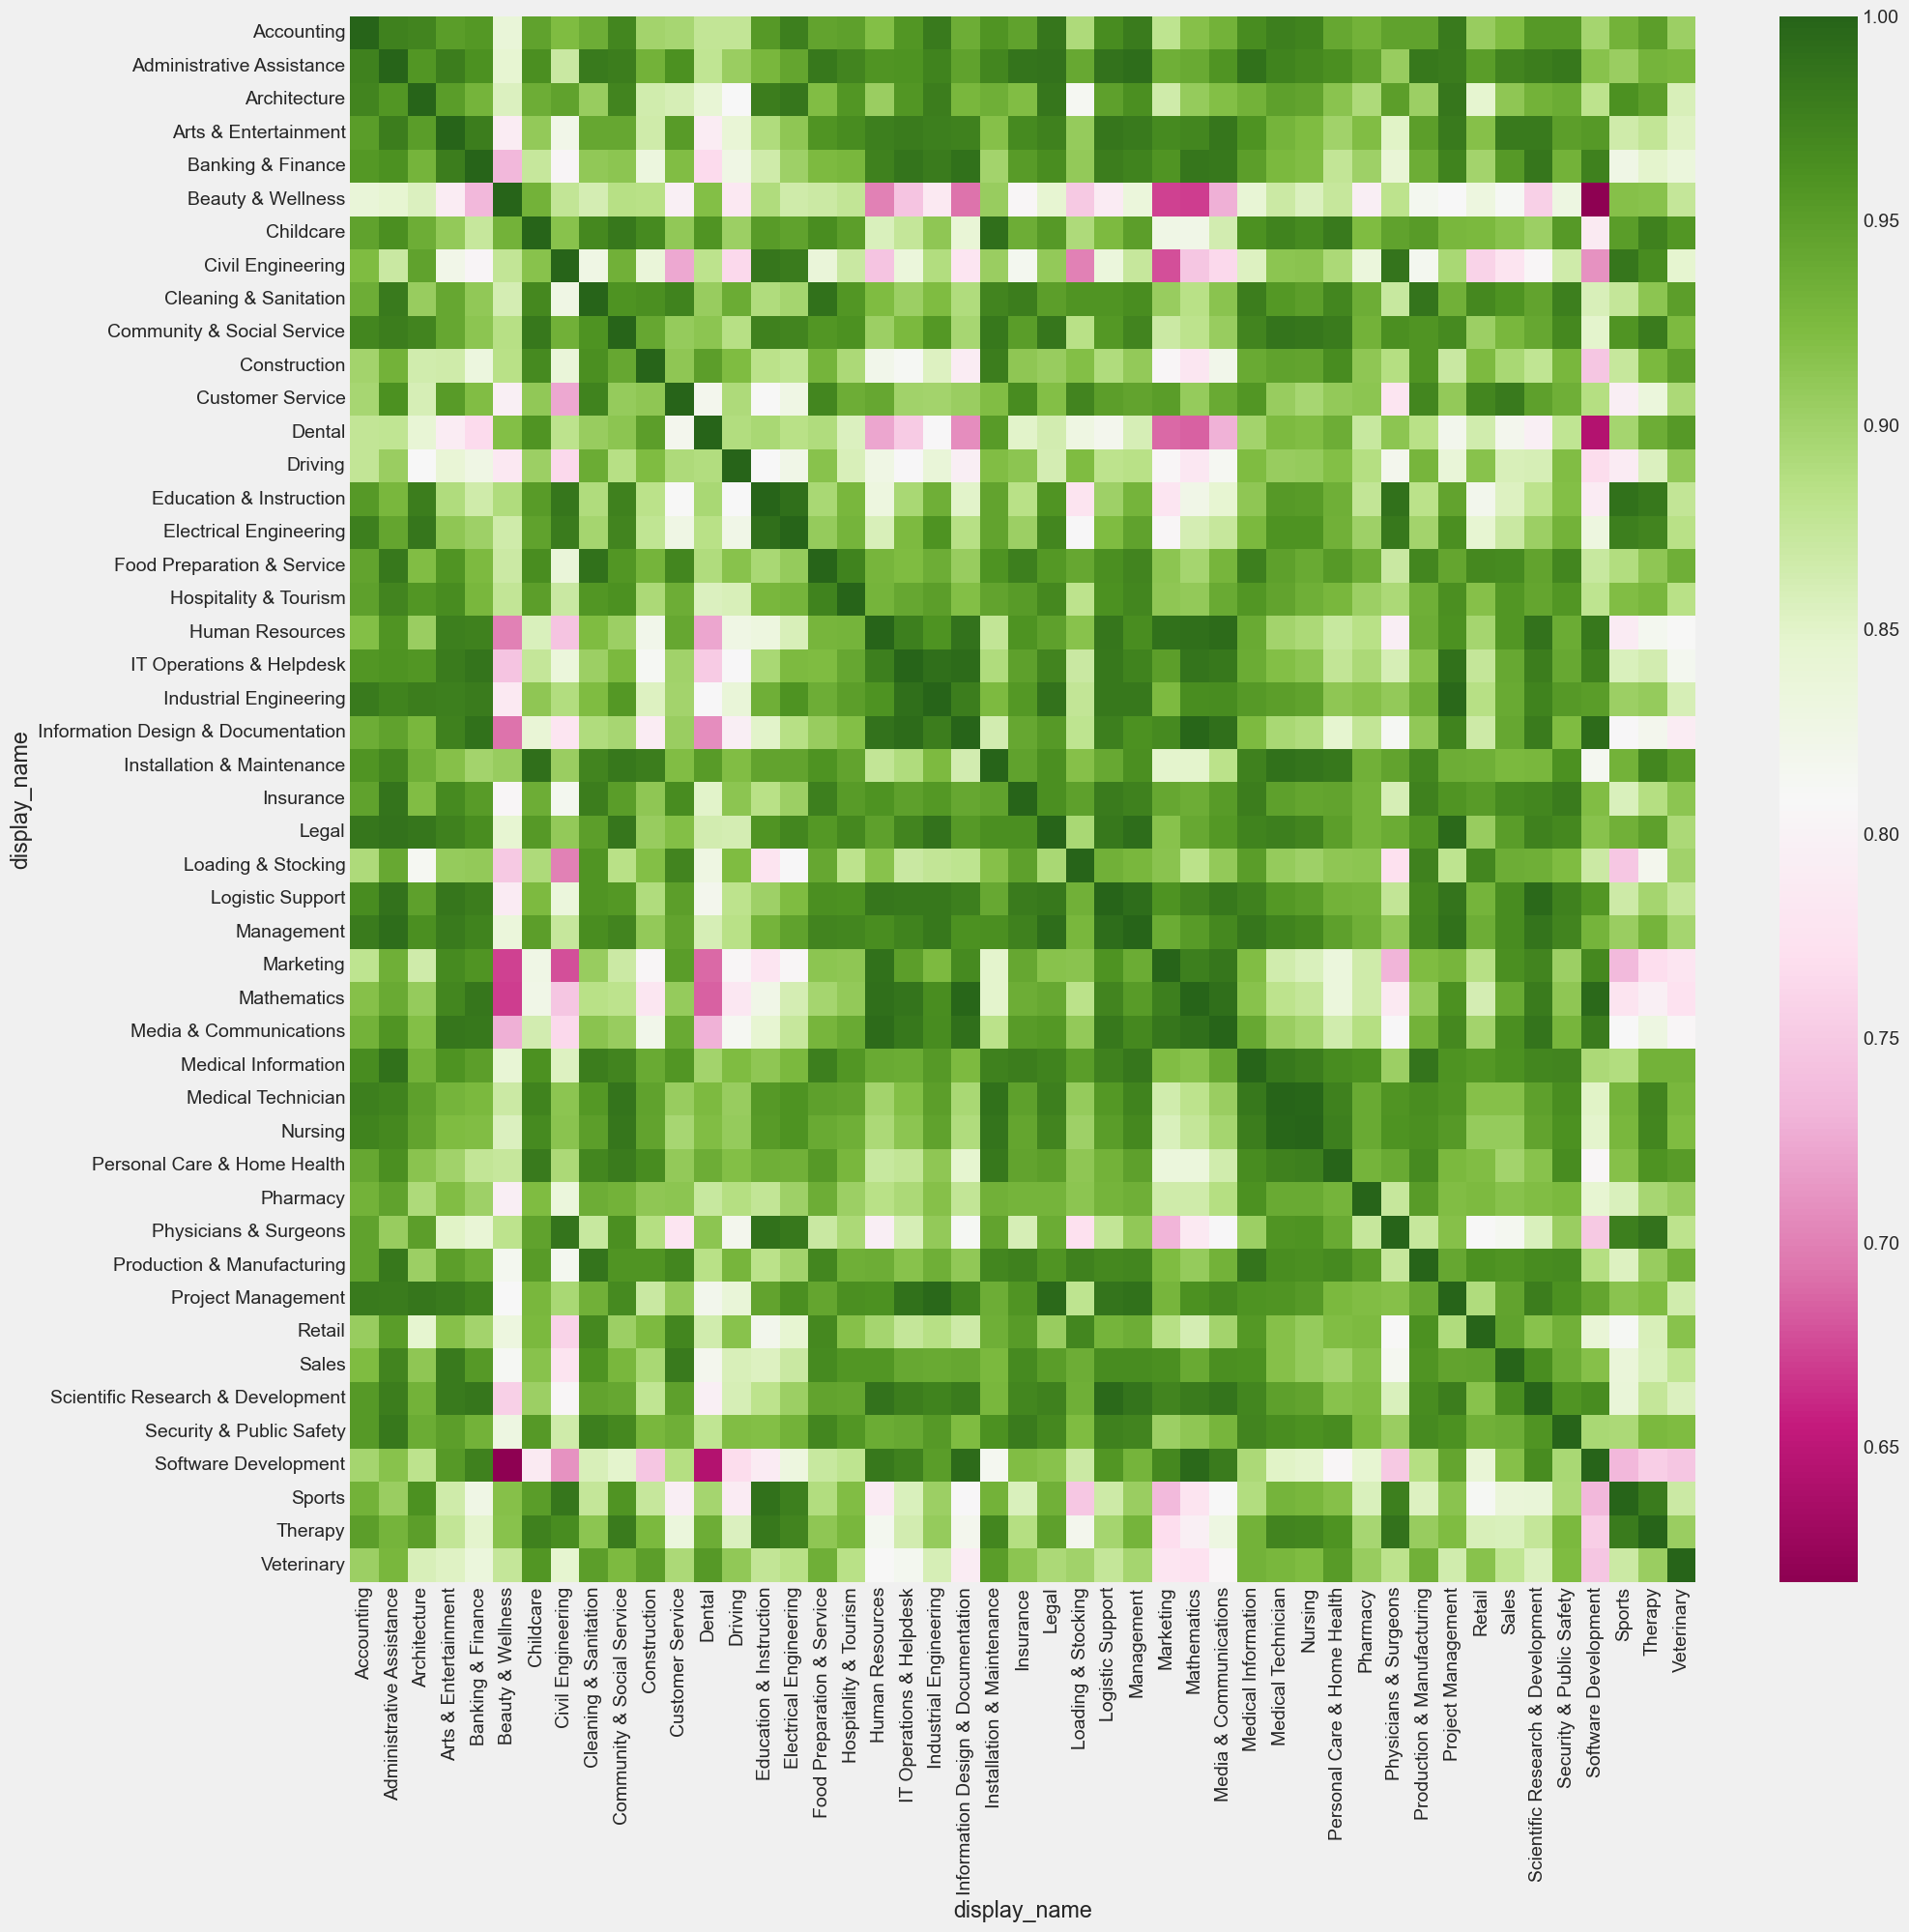

In [224]:
# Plot using heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="PiYG")
plt.show()

# The two sectors that are highly correlated to Soft Dev is Mathematics, Information Design & Documentation
# The two sectors that are least correlated to Soft Dev is Dental, and Beauty and Wellness


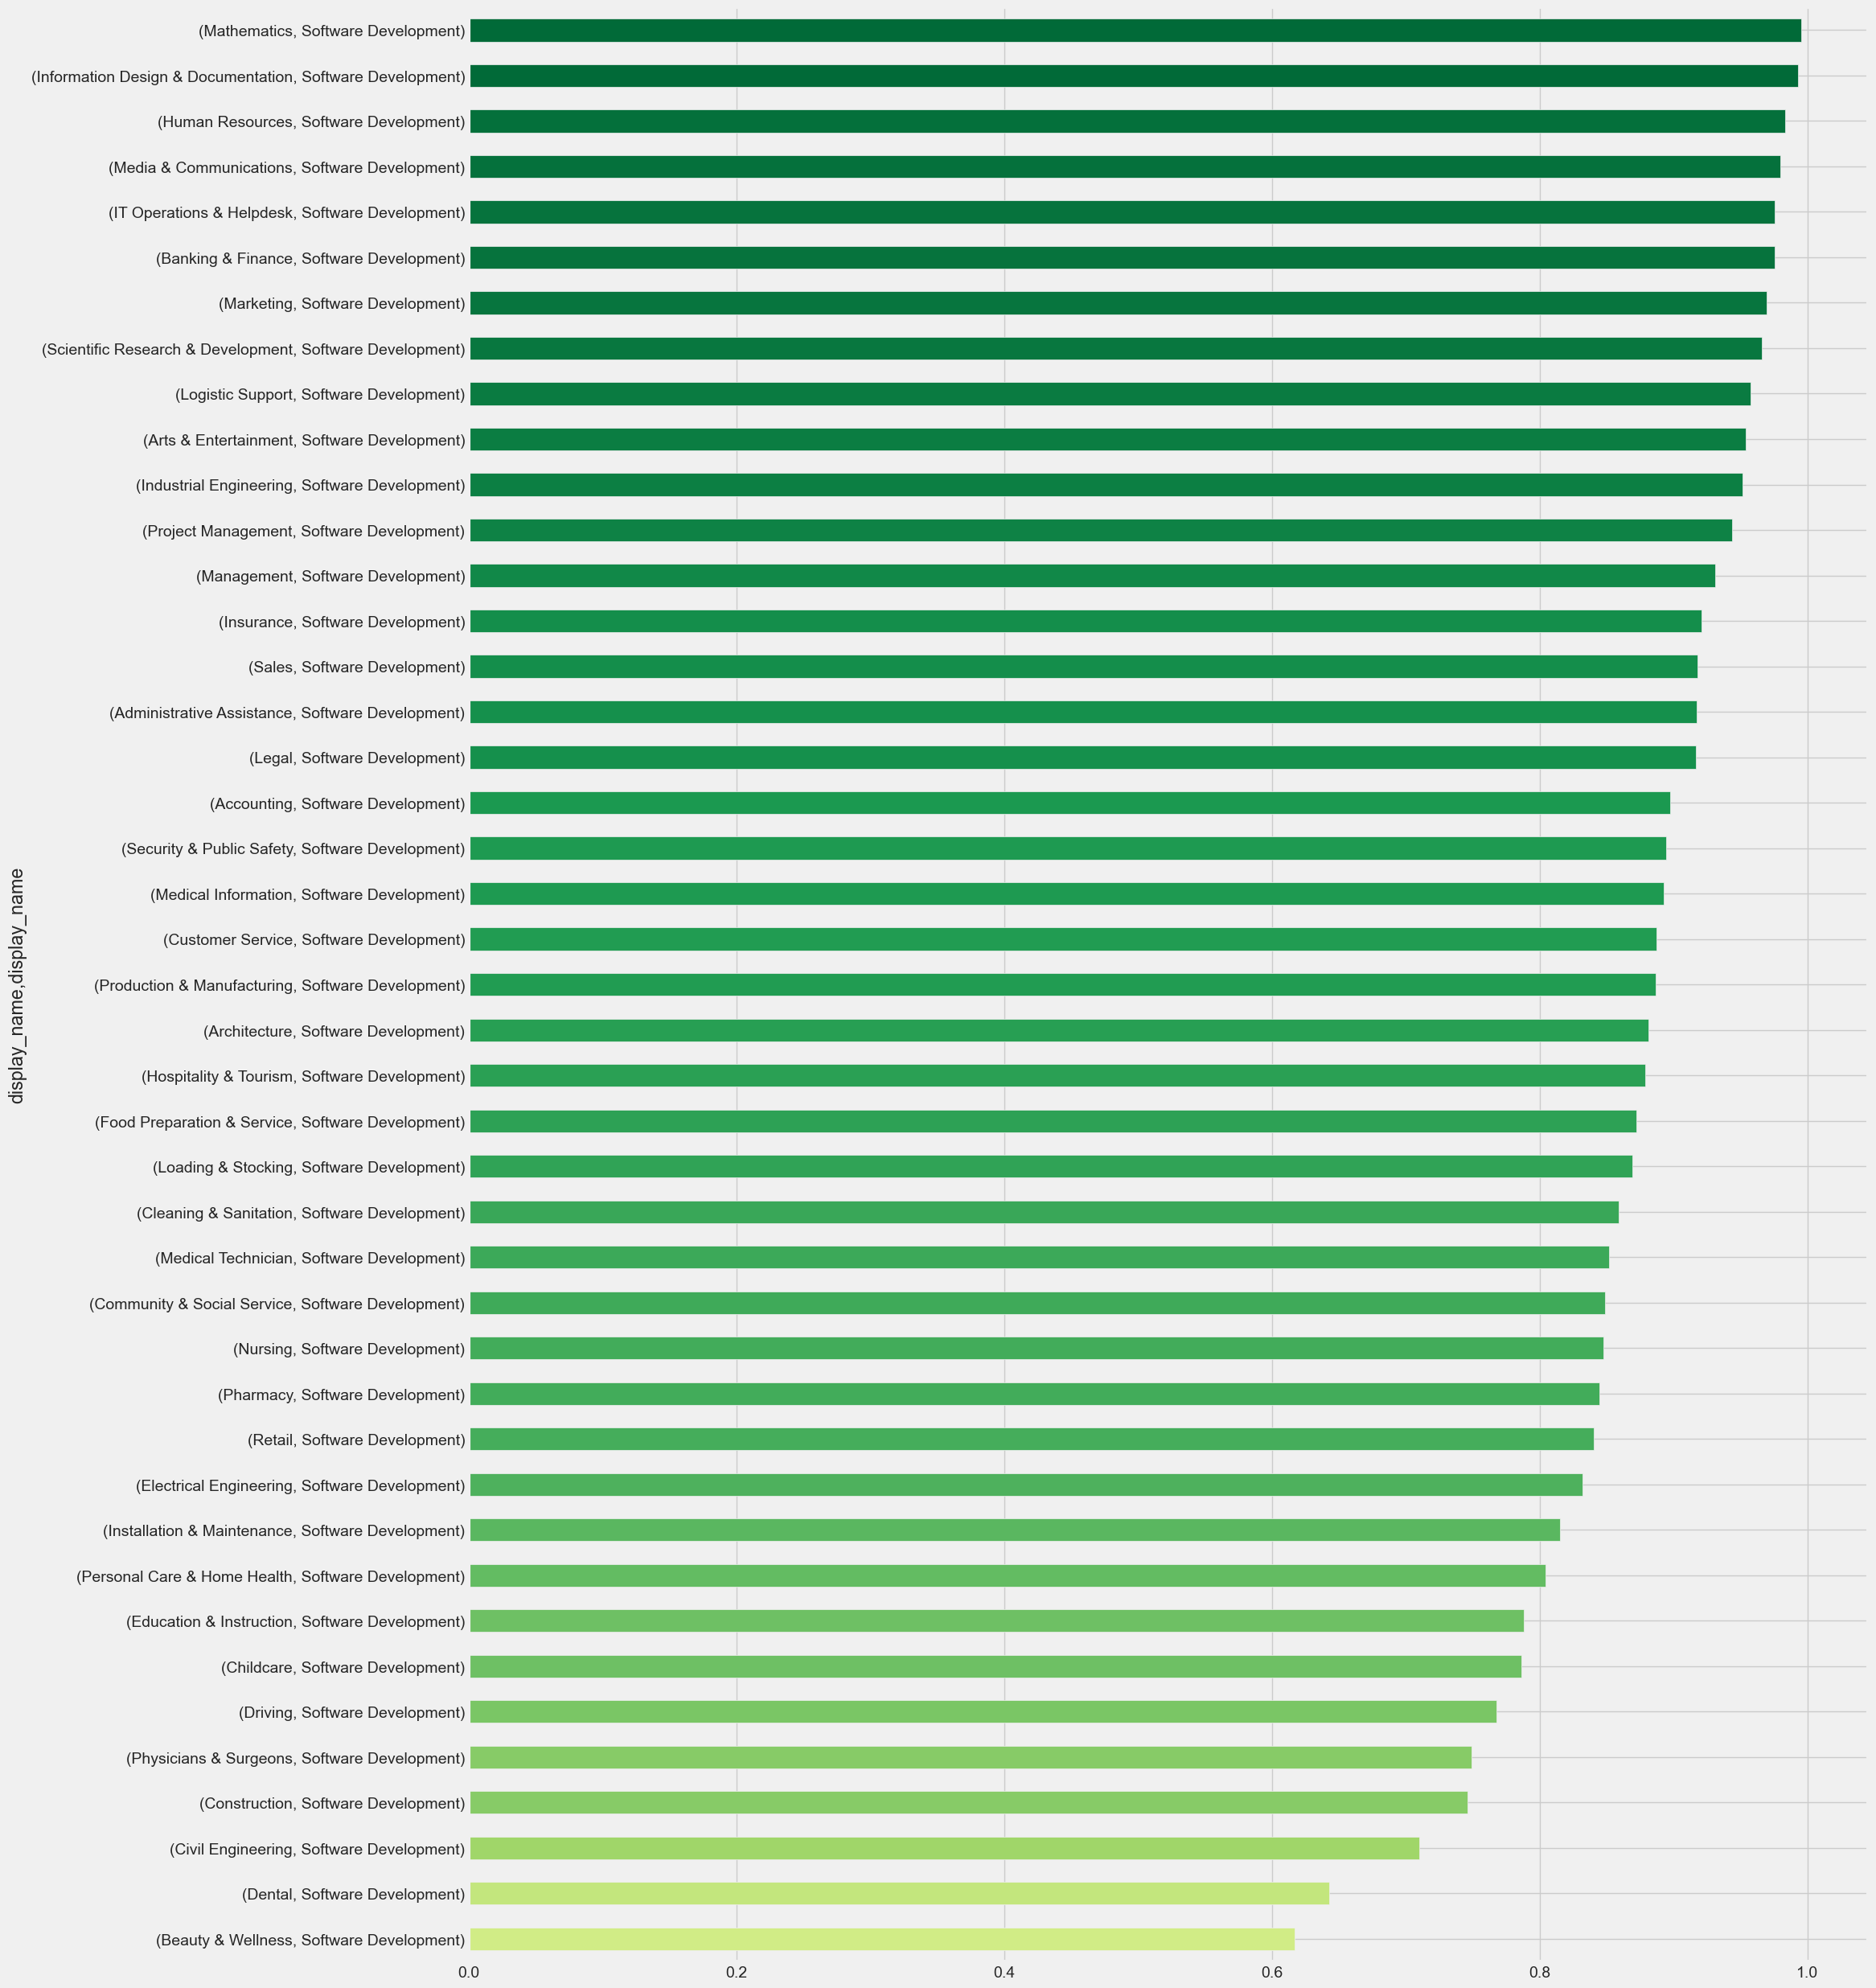

In [220]:
# Plot using horizontal bar graph
# Tip form: https://twitter.com/levikul09/status/1547184495815643136?s=20

# The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr_matrix_ = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

corr_sd = corr_matrix_.loc[:, ["Software Development"]].sort_values(ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(20, 30))
norm = TwoSlopeNorm(vmin=0, vcenter=0.5, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corr_sd.values]
corr_sd.plot.barh(color=colors)
plt.show()


### Q10 -Create a line plot, showing software job openings vs. the aggregate index.


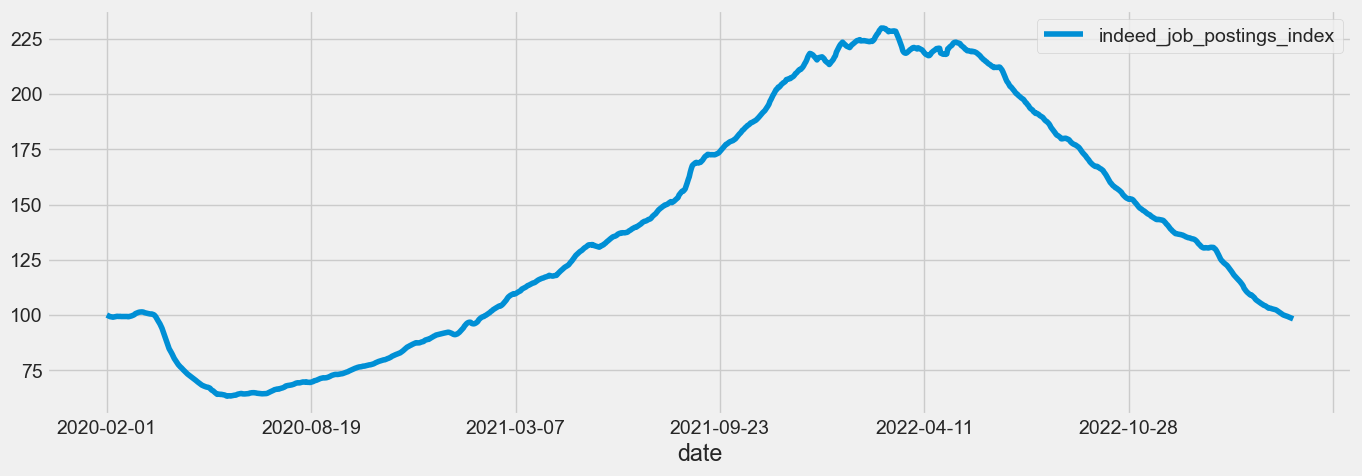

In [114]:
# Q10 -Create a line plot, showing software job openings vs. the aggregate index.
opening_df_sd = sector_df.query("display_name=='Software Development'")
opening_df_sd.plot(figsize=(15, 5))
plt.show()

### Q11- Create a line plot, showing software job openings in the US vs. those in Australia, Canada, Germany, France, and Great Britain.


In [175]:
# Q11- Create a line plot, showing software job openings in the US vs. those in Australia, Canada, Germany, France, and Great Britain.
country_list = ["US", "AU", "CA", "FR", "GB"]
df_list = []
for country in country_list:
    url = f"https://raw.githubusercontent.com/hiring-lab/job_postings_tracker/master/{country}/job_postings_by_sector_{country}.csv"
    df_postings = pd.read_csv(url, parse_dates=["date"])
    df_list.append(df_postings)
dfs_posting = pd.concat(df_list, axis=0, join="outer")
dfs_posting.head()


,date,jobcountry,indeed_job_postings_index,variable,display_name
0,2020-02-01,US,100.00,total postings,Accounting
1,2020-02-02,US,99.84,total postings,Accounting
2,2020-02-03,US,99.68,total postings,Accounting
3,2020-02-04,US,99.51,total postings,Accounting
4,2020-02-05,US,99.48,total postings,Accounting


In [176]:
dfs_posting.shape


(255640, 5)

In [177]:
dfs_posting.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 255640 entries, 0 to 56937
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       255640 non-null  datetime64[ns]
 1   jobcountry                 255640 non-null  object        
 2   indeed_job_postings_index  255640 non-null  float64       
 3   variable                   255640 non-null  object        
 4   display_name               255640 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.7+ MB


In [179]:
# Filter Software Dev
dfs_posting_sd = dfs_posting.query("display_name=='Software Development'")
dfs_posting_sd

,date,jobcountry,indeed_job_postings_index,variable,display_name
48804,2020-02-01,US,100.00,total postings,Software Development
48805,2020-02-02,US,99.75,total postings,Software Development
48806,2020-02-03,US,99.54,total postings,Software Development
48807,2020-02-04,US,99.29,total postings,Software Development
48808,2020-02-05,US,99.22,total postings,Software Development
...,...,...,...,...,...
52285,2023-04-03,GB,84.76,total postings,Software Development
52286,2023-04-04,GB,84.89,total postings,Software Development
52287,2023-04-05,GB,85.03,total postings,Software Development
52288,2023-04-06,GB,85.12,total postings,Software Development


/var/folders/h2/6110hgtx6b7400ybw7yjhn400000gn/T/ipykernel_8672/1685354187.py:12: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.lineplot(


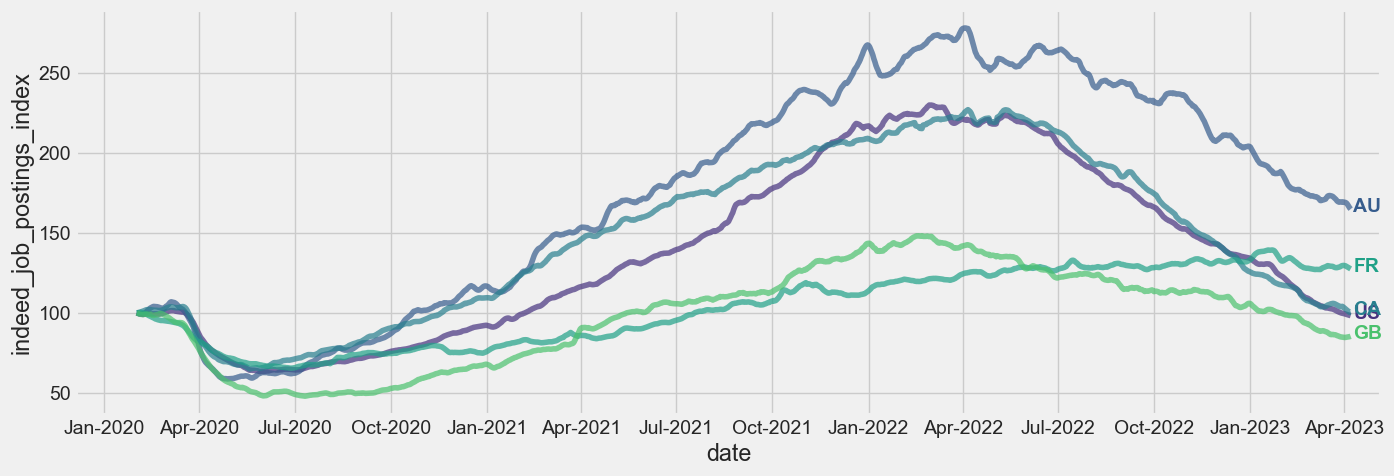

In [215]:
# Q11- Create a line plot, showing software job openings in the US vs. those in Australia, Canada, Germany, France, and Great Britain.
color_palette = sns.color_palette("viridis")

def line_plot(
    df: pd.DataFrame, x: str, y: str, hue: str, color_map: Union[str, list, dict]
):
    # Style
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(15, 5))

    # Plot
    ax = sns.lineplot(
        df, x=x, y=y, hue=hue, palette=color_map, alpha=0.7, legend=False
    )
    # Add the text--for each line, find the end, annotate it with a label, and
    # adjust the chart axes so that everything fits on.
    for line, name in zip(ax.lines, df[hue].unique()):
        y = line.get_ydata()[-1]  # NB: to use start value, set [-1] to [0] instead
        x = line.get_xdata()[-1]
        if not np.isfinite(y):
            y = next(reversed(line.get_ydata()[~line.get_ydata().mask]), float("nan"))
        if not np.isfinite(y) or not np.isfinite(x):
            continue
        text = ax.annotate(
            name,
            xy=(x, y),
            xytext=(2, -2), #YOU CAN ADJUST THE LOC OF LABEL HERE
            color=line.get_color(),
            xycoords=(ax.get_xaxis_transform(), ax.get_yaxis_transform()),
            textcoords="offset points",
            fontweight="bold",
        )
        text_width = (
            text.get_window_extent(fig.canvas.get_renderer())
            .transformed(ax.transData.inverted())
            .width
        )
        if np.isfinite(text_width):
            ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
    # Format x-axis to view dates properly
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
    # Show plot
    plt.show()
    return

# Run plot
line_plot(
    dfs_posting_sd,
    x="date",
    y="indeed_job_postings_index",
    hue="jobcountry",
    color_map=color_palette,
)


<Figure size 1500x500 with 0 Axes>

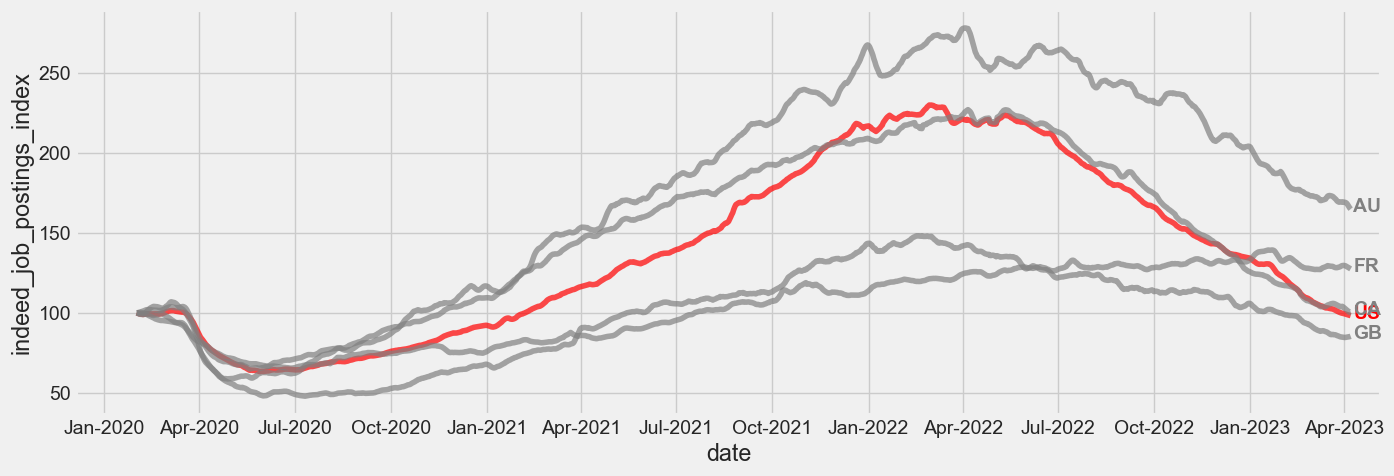

In [209]:
# Q11- Create a line plot, showing software job openings in the US vs. those in Australia, Canada, Germany, France, and Great Britain.
# Plot
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))

red_palette = {"US": "red", "AU": "gray", "CA": "gray", "FR": "gray", "GB": "gray"}
 
# Run plot
line_plot(
    dfs_posting_sd,
    x="date",
    y="indeed_job_postings_index",
    hue="jobcountry",
    color_map=red_palette,
)
